# Autoencoder

Autohenodery to sieci neuronowe zdolne do uczenia się wydajnych reprezentacji danych wejściowych, nazywanymi **codings** kodami, bez żadnego nadzoru. Te kody mają zazwyczaj znacznie mniejszą wymiarowość niż dane wejściowe, dzięki czemu autoenodemy są przydatne do redukcji wymiarów. 

Co ważniejsze, autoenodemy pełnią funkcję detektorów cech i mogą być używane jako ekstraktory cech (feature detectors) w głębokich sieciach neuronowe. 

Wreszcie są w stanie generować nowe dane, które wyglądają bardzo podobnie do danych uczących (nazywa się to modelem generatywnym). Możesz na przykład nauczyć autocenoder na zdjęciach twarzy, a następnie generować nowe twarze.


## Data Representations


Autoenoder zawsze składa się z dwóch części: 

  * enkodera, który konwertuje wejścia do nowej (wewnętrznwj) reprezentacji,
  * dekodera (lub sieci generatywna), który konwertuje wewnętrzną reprezentację na wyjścia.
  
Jak widać, autoenoderer zazwyczaj ma taką samą architekturę jak Perceptron wielowarstwowy (MLP), z tym że liczba neuronów w warstwie wyjściowej musi być równa liczbie wejść. 

W poniższym przykładzie istnieje tylko jedna ukryta warstwa złożona z dwóch neuronów (kodera) i jedna warstwa wyjściowa złożona z trzech neuronów (dekoder). Wyjścia są często nazywane **reconstructions** (rekonstrukcjami), ponieważ autoenoder próbuje zrekonstruować wejścia, a funkcja kosztu zawiera **reconstruction loss** (niedoskonałość rekonstrukcji), która karze model, gdy rekonstrukcje różnią się od wejść.  

## Wykonywanie PCA za pomocą autoenodera

Jeśli autoenoder wykorzystuje tylko aktywacje liniowe, a funkcja kosztu to błąd średniej kwadratowej (MSE), wówczas otrzymujemy PCA. Poniższy kod tworzy prosty liniowy autoencoder, aby wykonać PCA na zestawie danych 3D, wyświetlając go w 2D:

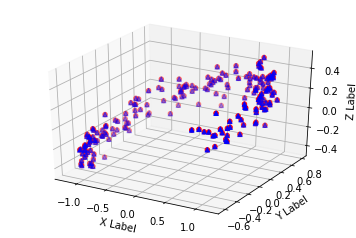

In [5]:
import numpy as np
import numpy.random as rnd
import os
import sys


rnd.seed(4)
m = 200
w1, w2 = 0.1, 0.3
noise = 0.1

angles = rnd.rand(m) * 3 * np.pi / 2 - 0.5
data = np.empty((m, 3))
data[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * rnd.randn(m) / 2
data[:, 1] = np.sin(angles) * 0.7 + noise * rnd.randn(m) / 2
data[:, 2] = data[:, 0] * w1 + data[:, 1] * w2 + noise * rnd.randn(m)

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

n = 100

# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
for c, m, zlow, zhigh in [('r', 'o', -50, -25), ('b', '^', -30, -5)]:
    xs = data[:, 0]
    ys = data[:, 1]
    zs = data[:, 2]
    ax.scatter(xs, ys, zs, c=c, marker=m)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()


# Zad
Wykonajs skalowanie danych
```python
from sklearn.preprocessing import StandardScaler
```

In [2]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(data[:100])
X_test = scaler.transform(data[100:])

In [3]:
import tensorflow as tf

tf.reset_default_graph()

n_inputs = 3
n_hidden = 2  # codings
n_outputs = n_inputs

learning_rate = 0.01

X = tf.placeholder(tf.float32, shape=[None, n_inputs])
hidden = tf.layers.dense(X, n_hidden)
outputs = tf.layers.dense(hidden, n_outputs)

reconstruction_loss = tf.reduce_mean(tf.square(outputs - X))

optimizer = tf.train.AdamOptimizer(learning_rate)
training_op = optimizer.minimize(reconstruction_loss)



C:\Users\admin\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [4]:
init = tf.global_variables_initializer()

n_iterations = 1000
codings = hidden

with tf.Session() as sess:
    init.run()
    for iteration in range(n_iterations):
        print("iteration ", iteration)
        training_op.run(feed_dict={X: X_train})
    codings_val = codings.eval(feed_dict={X: X_test})

iteration  0
iteration  1
iteration  2
iteration  3
iteration  4
iteration  5
iteration  6
iteration  7
iteration  8
iteration  9
iteration  10
iteration  11
iteration  12
iteration  13
iteration  14
iteration  15
iteration  16
iteration  17
iteration  18
iteration  19
iteration  20
iteration  21
iteration  22
iteration  23
iteration  24
iteration  25
iteration  26
iteration  27
iteration  28
iteration  29
iteration  30
iteration  31
iteration  32
iteration  33
iteration  34
iteration  35
iteration  36
iteration  37
iteration  38
iteration  39
iteration  40
iteration  41
iteration  42
iteration  43
iteration  44
iteration  45
iteration  46
iteration  47
iteration  48
iteration  49
iteration  50
iteration  51
iteration  52
iteration  53
iteration  54
iteration  55
iteration  56
iteration  57
iteration  58
iteration  59
iteration  60
iteration  61
iteration  62
iteration  63
iteration  64
iteration  65
iteration  66
iteration  67
iteration  68
iteration  69
iteration  70
iteration  71
it

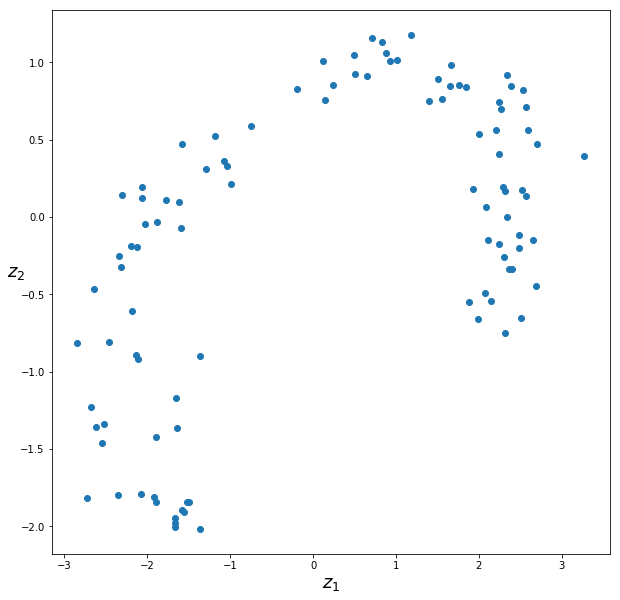

In [5]:
fig = plt.figure(figsize=(10,10))
plt.plot(codings_val[:,0], codings_val[:, 1], "o")
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18, rotation=0)
plt.show()

Ten kod nie różni się bardzo od MLP. Dwie rzeczy do zapamiętania to:
  
  * Liczba wyjść jest równa liczbie wejść.
  * Aby wykonać prosty PCA, ustawiamy activation_fn = None (tj. Wszystkie neurony są liniowe), a funkcją kosztu jest MSE.

# Zad

Dla danych iris wykonaj redukcję wymiarowości za pomocą autoencodera.
Następnie wykonaj algorytm PCA i porównaj wyniki.

In [6]:
from sklearn.decomposition import PCA 
from sklearn import datasets

np.random.seed(5)

centers = [[1, 1], [-1, -1], [1, -1]]
iris = datasets.load_iris()
X_train = iris.data
y_train = iris.target
print(X_train.shape)

(150, 4)


## Deep autoenkoder

Podobnie jak inne sieci neuronowe, o których mówiliśmy, autoenkodery mogą mieć wiele ukrytych warstw. W tym przypadku są one nazywane **deep autoenkoder** lub **stacked autoencoders**. 

Dodanie kolejnych warstw pomaga autoenkoderowi uzyskać bardziej złożone kodowanie. Należy jednak uważać, aby nie spowodować, aby autoenkoder był zbyt mocny. Wyobraź sobie enkoder tak potężny, że uczy się mapować każde wejście na jedną dowolną liczbę (a dekoder uczy odwrotnego mapowania). Oczywiście taki autoenkoder idealnie zrekonstruuje dane treningowe, ale nie nauczy się żadnej użytecznej reprezentacji danych (i jest mało prawdopodobne, aby generalizować dobrze nowe instancje).

Architektura głębokich autoenkoderó jest zwykle symetryczna w odniesieniu do centralnej ukrytej warstwy (warstwy kodującej). 

Na przykład, autoenoder do danych MNIST może mieć 784 neuronów wejścia, następnie ukryta warstwa z 300 neuronami, następnie centralna ukryta warstwa z 150 neuronów, następnie kolejna ukryta warstwa z 300 neuronami i warstwa wyjściowa z 784 neuronami. 

In [3]:
###########################################################################################
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("../data/MNIST_data/", one_hot=True)
###########################################################################################

Extracting ../data/MNIST_data/train-images-idx3-ubyte.gz
Extracting ../data/MNIST_data/train-labels-idx1-ubyte.gz
Extracting ../data/MNIST_data/t10k-images-idx3-ubyte.gz
Extracting ../data/MNIST_data/t10k-labels-idx1-ubyte.gz


In [6]:
X = mnist.train.images # Returns np.array
y = np.asarray(mnist.train.labels, dtype=np.int32)

X.shape

(55000, 784)

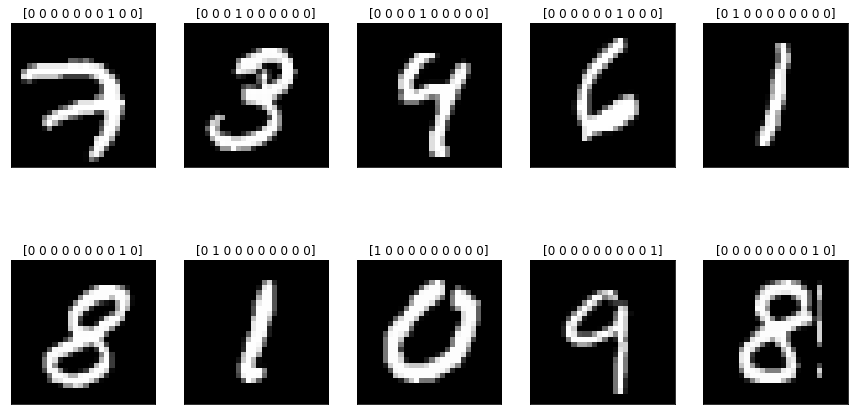

In [7]:
fig, axes = plt.subplots(2, 5, figsize=(15, 8), subplot_kw={'xticks': (), 'yticks': ()})
for target, image, ax in zip(y, X, axes.ravel()):
    ax.imshow(image.reshape(28, 28), cmap=plt.cm.gist_gray)
    ax.set_title(target)
plt.show() 

# Zad

Zbuduj autoencoder na MNIST.

In [75]:
def euclidean_norm_squared(X, axis=None):
    return tf.reduce_sum(tf.square(X), axis=axis)

def mean_squared_euclidean_norm_reconstruction_error(input, output):
    return tf.reduce_mean(euclidean_norm_squared(input - output, axis=1))

In [14]:
tf.reset_default_graph()

from functools import partial

n_inputs = 28 * 28
n_hidden1 = 200
n_hidden2 = 200
n_hidden3 = 200  # codings
z_dim = 20
n_hidden4 = n_hidden3
n_hidden5 = n_hidden2
n_hidden6 = n_hidden1
n_outputs = n_inputs
learning_rate = 0.001

initializer = tf.contrib.layers.variance_scaling_initializer()

my_dense_layer = partial(
    tf.layers.dense,
    activation=tf.nn.relu,
    kernel_initializer=initializer)

X = tf.placeholder(tf.float32, [None, n_inputs])

...

z_mean = my_dense_layer(hidden3, units=z_dim)

...

outputs = my_dense_layer(hidden6, n_outputs)

#reconstruction_loss = tf.reduce_mean(tf.square(outputs - X))
reconstruction_loss = tf.reduce_mean(mean_squared_euclidean_norm_reconstruction_error(X, outputs))


learning_rate = 0.001

optimizer = tf.train.AdamOptimizer(learning_rate)
training_op = optimizer.minimize(reconstruction_loss)

init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [15]:
n_epochs = 101
batch_size = 128

reconstruction_cost_valid_array = []
with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        n_batches = mnist.train.num_examples // batch_size
        for iteration in range(n_batches):
            print("\r{}%".format(100 * iteration // n_batches), end="")
            sys.stdout.flush()
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            sess.run(training_op, feed_dict={X: X_batch})
        #loss_train = reconstruction_loss.eval(feed_dict={X: X_batch})
        #print("\r{}".format(epoch), "Train MSE:", loss_train)
        reconstruction_cost_valid = reconstruction_loss.eval({X: mnist.validation.images})
        print(" ", epoch, "Error:", reconstruction_cost_valid ) 
        reconstruction_cost_valid_array.append(reconstruction_cost_valid)
        saver.save(sess, "./autoencoder_weights.ckpt")
        

99%  0 Error: 30.106384
99%  1 Error: 27.726988
99%  2 Error: 26.223558
99%  3 Error: 25.590824
99%  4 Error: 24.28924
99%  5 Error: 22.74787
99%  6 Error: 21.98599
99%  7 Error: 21.428375
99%  8 Error: 21.116915
99%  9 Error: 20.539593
99%  10 Error: 20.253971
99%  11 Error: 20.013765
99%  12 Error: 20.135197
99%  13 Error: 19.492779
99%  14 Error: 19.492458
99%  15 Error: 19.214071
99%  16 Error: 19.02122
99%  17 Error: 19.000269
99%  18 Error: 18.851511
99%  19 Error: 18.87905
99%  20 Error: 18.700594
99%  21 Error: 18.69575
99%  22 Error: 18.586927
99%  23 Error: 18.356314
99%  24 Error: 18.332207
99%  25 Error: 18.257544
99%  26 Error: 18.20642
99%  27 Error: 18.250774
99%  28 Error: 18.124228
99%  29 Error: 18.020176
99%  30 Error: 18.001606
99%  31 Error: 17.932377
99%  32 Error: 17.97175
99%  33 Error: 17.866621
99%  34 Error: 17.896515
99%  35 Error: 17.839722
99%  36 Error: 17.838552
99%  37 Error: 17.790237
99%  38 Error: 17.711332
99%  39 Error: 17.707354
99%  40 Error: 17.

# Zad
Narysuj krzywą uczenia.

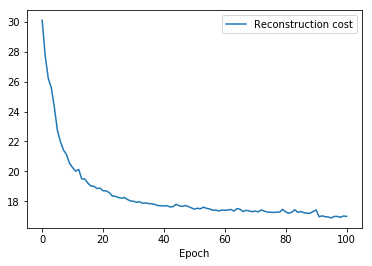

In [16]:
import matplotlib
import matplotlib.pyplot as plt


plt.figure()
plt.plot(reconstruction_cost_valid_array, label='Reconstruction cost')

plt.xlabel('Epoch')
plt.legend()
plt.show()

# Zad
Narysuj dane w latent.

In [ ]:
with tf.Session() as sess:
    saver.restore(sess, "./autoencoder_weights.ckpt") 
    z, Y = sess.run([z_mean, outputs], { X: mnist.validation.images })

    #plt.style.use('classic')
    #plt.figure(figsize=(6, 6))
    #plt.axes().set_aspect('equal')
    # plt.xlim(-6, 6)
    # plt.ylim(-6, 6)

    plt.scatter(z[:, 2], z[:, 10], c=np.argmax(mnist.validation.labels, axis=1))

    plt.show()

# Zad 
Wykonaj T-SNE

In [18]:
with tf.Session() as sess:
    saver.restore(sess, "./autoencoder_weights.ckpt") 
    z, Y = sess.run([z_mean, outputs], { X: mnist.validation.images })

import numpy as np
from sklearn.manifold import TSNE
z_embedded = TSNE(n_components=2).fit_transform(z)

INFO:tensorflow:Restoring parameters from ./autoencoder_weights.ckpt


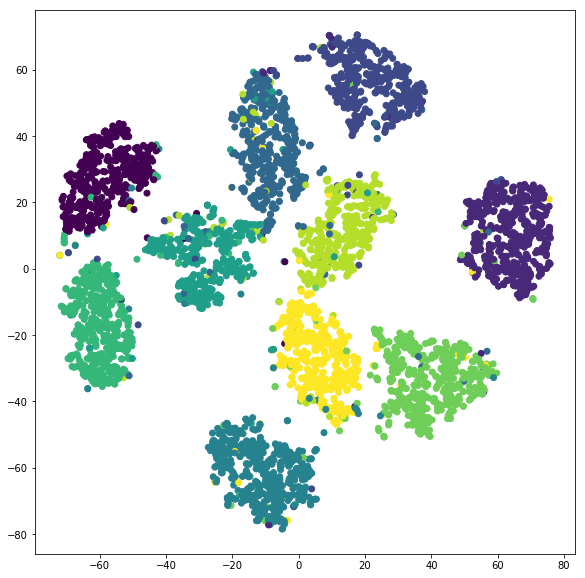

In [19]:
plt.figure(figsize=(10, 10))
plt.axes().set_aspect('equal')
# plt.xlim(-6, 6)
# plt.ylim(-6, 6)

plt.scatter(z_embedded[:, 0], z_embedded[:, 1], c=np.argmax(mnist.validation.labels, axis=1))

plt.show()

# Rekonstrukcje

In [20]:
n_test_digits = 100    
    
with tf.Session() as sess:
    saver.restore(sess, "./autoencoder_weights.ckpt") 
    X_test = mnist.train.images[:n_test_digits]
    outputs_val = outputs.eval(feed_dict={X: X_test})


INFO:tensorflow:Restoring parameters from ./autoencoder_weights.ckpt


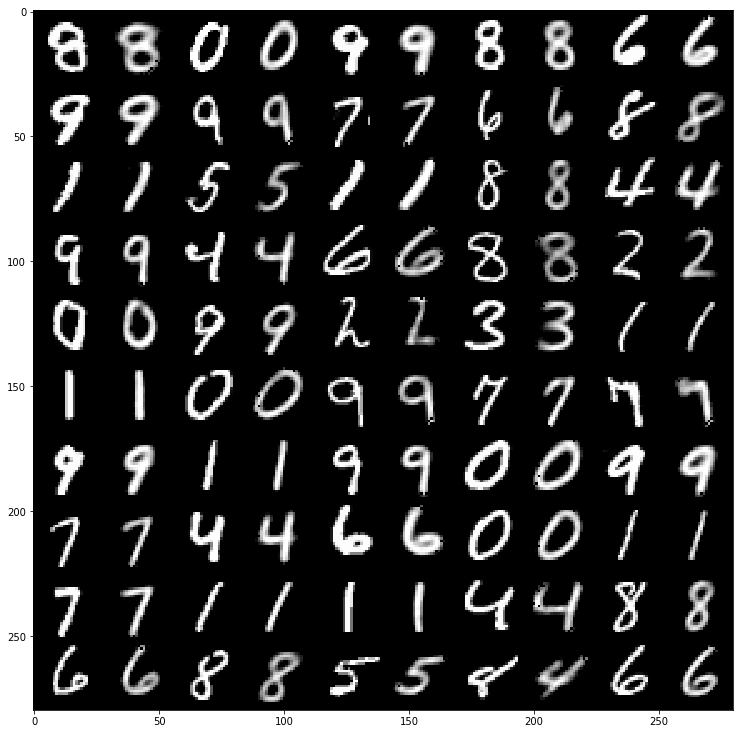

In [21]:
nx = ny = 10

x_values = np.linspace(-2, 2, nx)
y_values = np.linspace(-2, 2, ny)
ind = 0
canvas = np.empty((28*ny, 28*nx))
for i, yi in enumerate(x_values):
    for j, xi in enumerate(y_values):
        if (((j+1) % 2) == 1):
            canvas[(nx-i-1)*28:(nx-i)*28, j*28:(j+1)*28] = X_test[ind].reshape(28, 28) 
        else:
            canvas[(nx-i-1)*28:(nx-i)*28, j*28:(j+1)*28] = outputs_val[ind].reshape(28, 28) 
            ind +=1
#         print( ((j) % 2) )
            
plt.figure(figsize=(10, 10))   
plt.axes().set_aspect('equal')
plt.imshow(np.clip(canvas,0,1), origin="upper", cmap=plt.cm.gray)
plt.tight_layout(pad=0)
plt.show()

# Variational Autoencoders

Kolejna ważna kategoria autododerów są: wariacyjnych autoencoder **Variational Autoencoders**.

Różnią się one od klasycznych autoencoder, które omówiliśmy do tej pory, w szczególności:

  * Są to probabilistyczne autoencodery, co oznacza, że ich wyniki są częściowo losowe.
  * Co najważniejsze, są to generatywne autoencoder, co oznacza, że mogą generować nowe instancje, które wyglądają, jakby zostały pobrane z zestawu treningowego.


Rzućmy okiem na to, jak działają Variational Autoencoders. Rysunek poniżej (jego lewa część) pokazuje Variational Autoencoders. Można oczywiście rozpoznać podstawową strukturę wszystkich autoencoderów, z enkoderem, po którym następuje dekoder (w tym przykładzie oba mają dwie ukryte warstwy), ale jest pewna różnica: zamiast bezpośredniego tworzenia kodu dla danego wejścia , koder wytwarza średnią $\mu$ i odchylenie standardowe $\sigma$. Rzeczywiste kodowanie jest następnie losowo próbkowane z rozkładu Gaussa ze średnią $\mu$ i odchyleniem standardowym $\sigma$. Następnie dekoder dekoduje normalnie kodowane próbkowanie. 

Prawa część diagramu pokazuje proces jaki przechdzą dane wejściowe przechodzące przez autoencoder. Najpierw enkoder wytwarza $\mu$ i $\sigma$, następnie losowo próbkowane jest kodowanie (zauważ, że nie jest ono dokładnie umiejscowione w $\mu$), i ostatecznie to kodowanie jest dekodowane, a końcowe wyjście przypomina instancję wejściową.

http://kvfrans.com/variational-autoencoders-explained/


In [ ]:
from tensorflow.contrib.distributions import MultivariateNormalDiag, kl_divergence

tf.reset_default_graph()

from functools import partial

n_inputs = 28 * 28
n_hidden1 = 200
n_hidden2 = 200
n_hidden3 = 200  
z_dim = 20
n_hidden4 = n_hidden3
n_hidden5 = n_hidden2
n_hidden6 = n_hidden1
n_outputs = n_inputs
learning_rate = 0.001

initializer = tf.contrib.layers.variance_scaling_initializer()

my_dense_layer = partial(
    tf.layers.dense,
    activation=tf.nn.elu,
    kernel_initializer=initializer)

X = tf.placeholder(tf.float32, [None, n_inputs])

...

z_mean = my_dense_layer(hidden3, z_dim, activation=None)
z_log_var = my_dense_layer(hidden3, z_dim, activation=None)

var_clip_val=3
variance = tf.exp(tf.clip_by_value(z_log_var, -var_clip_val, var_clip_val))
tensor_z_distr = MultivariateNormalDiag(loc = z_mean, scale_diag= variance)
noise = tensor_z_distr.sample()

...

target_distribution = MultivariateNormalDiag(loc= ... , scale_diag= ... )

Dkl = tf.reduce_mean( kl_divergence( ..., ... ) )
reconstruction_loss = tf.reduce_mean(mean_squared_euclidean_norm_reconstruction_error(X, outputs))


tensor_cost = tf.reduce_mean(reconstruction_loss + Dkl)

learning_rate = 0.001

optimizer = tf.train.AdamOptimizer(learning_rate)
training_op = optimizer.minimize(tensor_cost)

init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [ ]:
n_epochs = 101
batch_size = 128

reconstruction_cost_valid_array = []
DKL_valid_array = []
with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        n_batches = mnist.train.num_examples // batch_size
        
        ...
        

In [9]:
import matplotlib
import matplotlib.pyplot as plt




# Zad
Narysuj dane w latent.

# Zad 
Wykonaj T-SNE

# Reconstrukcje

# Próbkowanie

In [ ]:
with tf.Session() as sess:
    saver.restore(sess, "./VAE_weights.ckpt") 
    nx = ny = 10

    x_values = np.linspace(-2, 2, nx)
    y_values = np.linspace(-2, 2, ny)

    canvas = np.empty((28*ny, 28*nx))
    for i, yi in enumerate(x_values):
        for j, xi in enumerate(y_values):

            mu, sigma = 0, 1 
            tmp = np.random.normal(mu, sigma, z_dim)
            zz = np.array([tmp])

            yy= sess.run([outputs], { noise: zz })

            canvas[(nx-i-1)*28:(nx-i)*28, j*28:(j+1)*28] = yy[0].reshape(28, 28)

    plt.figure(figsize=(10, 10))   
    plt.axes().set_aspect('equal')
    plt.imshow(np.clip(canvas,0,1), origin="upper", cmap=plt.cm.gray)
    plt.tight_layout(pad=0)
    plt.show()

# Interpolacje

In [ ]:
out_z=[[1,2],[3,4],[5,6],[7,8],[9,10],[11,12],[13,14],[15,16],[15,17],[18,1]]


with tf.Session() as sess:
    saver.restore(sess, "./VAE_weights.ckpt") 
    nx = 10
    ny = 10
    n_iterations= nx

    x_values = np.linspace(-2, 2, nx)
    y_values = np.linspace(-2, 2, ny)

    canvas = np.empty((28*ny, 28*nx))
    for i, yi in enumerate(y_values):

        x_sample = mnist.validation.images[out_z[i]]
        out_z1 = sess.run([z_mean], { X: x_sample })
        out_z1=out_z1[0]
        codings_rnd=out_z1[0]
        target_codings = out_z1[1]

        A = np.array(codings_rnd)
        for iteration in np.arange(1,n_iterations):
            codings_interpolate = codings_rnd + (target_codings - codings_rnd) * iteration / n_iterations
            A = np.vstack([A,codings_interpolate])


        y1 = sess.run([outputs], { noise: A })
        y1=y1[0]
        for j, xi in enumerate(x_values):
            d_plot = y1[j]
            d_plot[d_plot<0]=0
            d_plot[d_plot>1]=1
            canvas[(ny-i-1)*28:(ny-i)*28, j*28:(j+1)*28] = d_plot.reshape(28, 28)

    plt.figure(figsize=(10, 10))
    plt.axes().set_aspect('equal')
    plt.axis("off")
    plt.imshow(canvas, origin="upper", cmap=plt.cm.gray)
    plt.tight_layout(pad=0)
    plt.show()

# CWAE

https://arxiv.org/pdf/1805.09235.pdf

In [33]:
def euclidean_norm_squared(X, axis=None):
    return tf.reduce_sum(tf.square(X), axis=axis) 

def cw_index(X):
    N = tf.cast(tf.shape(X)[0], tf.float32)
    D = tf.cast(tf.shape(X)[1], tf.float32)
    H = tf.pow(4/(3*N), 0.4)
    K = 1/(2*D-3)

    A1 = euclidean_norm_squared(tf.subtract(tf.expand_dims(X, 0), tf.expand_dims(X, 1)), axis=2)
    A = (1/(N**2)) * tf.reduce_sum((1/tf.sqrt(H + K*A1)))

    B1 = euclidean_norm_squared(X, axis=1)
    B = (2/N)*tf.reduce_sum((1/tf.sqrt(H + 0.5 + K*B1)))

    return (1/tf.sqrt(1+H)) + A - B

In [61]:
tf.reset_default_graph()

from functools import partial

n_inputs = 28 * 28
n_hidden1 = 200
n_hidden2 = 200
n_hidden3 = 200  
z_dim = 20
n_hidden4 = n_hidden3
n_hidden5 = n_hidden2
n_hidden6 = n_hidden1
n_outputs = n_inputs
learning_rate = 0.001

initializer = tf.contrib.layers.variance_scaling_initializer()

my_dense_layer = partial(
    tf.layers.dense,
    activation=tf.nn.elu,
    kernel_initializer=initializer)

X = tf.placeholder(tf.float32, [None, n_inputs])

...

z_mean = my_dense_layer(hidden3, z_dim, activation=None)

...

outputs = my_dense_layer(hidden6, n_outputs)


CW_cost = tf.reduce_mean( cw_index( ... ) )

# reconstruction_error = tf.reduce_sum(tf.square( X - outputs ))
reconstruction_error = tf.reduce_mean(mean_squared_euclidean_norm_reconstruction_error(X, outputs))

cost = ( reconstruction_error  + tf.log(CW_cost))

learning_rate = 0.001

optimizer = tf.train.AdamOptimizer(learning_rate)
training_op = optimizer.minimize(cost)

init = tf.global_variables_initializer()
saver = tf.train.Saver()

# Zad
Narysuj krzywą uczenia.

# Zad
Narysuj dane w latent.

# Reconstrukcje

# Próbkowanie

# Interpolacje

# Wasserstein Auto-Encoders

https://github.com/tolstikhin/wae/blob/master/wae.py

In [76]:
def mmd_penalty(sample_qz, sample_pz):
    sigma2_p = 1. ** 2
    kernel = 'IMQ'

    n = tf.cast(tf.shape(sample_qz)[0], tf.float32)#utils.get_batch_size(sample_qz)
    d = tf.cast(tf.shape(sample_qz)[1], tf.float32)

    n = tf.cast(n, tf.int32)
    nf = tf.cast(n, tf.float32)
    half_size = (n * n - n) / 2

    norms_pz = tf.reduce_sum(tf.square(sample_pz), axis=1, keep_dims=True)
    dotprods_pz = tf.matmul(sample_pz, sample_pz, transpose_b=True)
    distances_pz = norms_pz + tf.transpose(norms_pz) - 2. * dotprods_pz

    norms_qz = tf.reduce_sum(tf.square(sample_qz), axis=1, keep_dims=True)
    dotprods_qz = tf.matmul(sample_qz, sample_qz, transpose_b=True)
    distances_qz = norms_qz + tf.transpose(norms_qz) - 2. * dotprods_qz

    dotprods = tf.matmul(sample_qz, sample_pz, transpose_b=True)
    distances = norms_qz + tf.transpose(norms_pz) - 2. * dotprods

    if kernel == 'RBF':
        # Median heuristic for the sigma^2 of Gaussian kernel
        sigma2_k = tf.nn.top_k(
            tf.reshape(distances, [-1]), half_size).values[half_size - 1]
        sigma2_k += tf.nn.top_k(
            tf.reshape(distances_qz, [-1]), half_size).values[half_size - 1]
        # Maximal heuristic for the sigma^2 of Gaussian kernel
        # sigma2_k = tf.nn.top_k(tf.reshape(distances_qz, [-1]), 1).values[0]
        # sigma2_k += tf.nn.top_k(tf.reshape(distances, [-1]), 1).values[0]
        # sigma2_k = opts['latent_space_dim'] * sigma2_p
        res1 = tf.exp(- distances_qz / 2. / sigma2_k)
        res1 += tf.exp(- distances_pz / 2. / sigma2_k)
        res1 = tf.multiply(res1, 1. - tf.eye(n))
        res1 = tf.reduce_sum(res1) / (nf * nf - nf)
        res2 = tf.exp(- distances / 2. / sigma2_k)
        res2 = tf.reduce_sum(res2) * 2. / (nf * nf)
        stat = res1 - res2
    elif kernel == 'IMQ':
        # k(x, y) = C / (C + ||x - y||^2)
        # C = tf.nn.top_k(tf.reshape(distances, [-1]), half_size).values[half_size - 1]
        # C += tf.nn.top_k(tf.reshape(distances_qz, [-1]), half_size).values[half_size - 1]
        #if opts['pz'] == 'normal':
        Cbase = 2. * d * sigma2_p
        #elif opts['pz'] == 'sphere':
        #    Cbase = 2.
        #elif opts['pz'] == 'uniform':
            # E ||x - y||^2 = E[sum (xi - yi)^2]
            #               = zdim E[(xi - yi)^2]
            #               = const * zdim
        #    Cbase = opts['zdim']
        stat = 0.
        for scale in [.1, .2, .5, 1., 2., 5., 10.]:
            C = Cbase * scale
            res1 = C / (C + distances_qz)
            res1 += C / (C + distances_pz)
            res1 = tf.multiply(res1, 1. - tf.eye(n))
            res1 = tf.reduce_sum(res1) / (nf * nf - nf)
            res2 = C / (C + distances)
            res2 = tf.reduce_sum(res2) * 2. / (nf * nf)
            stat += res1 - res2
    return stat


In [91]:
tf.reset_default_graph()

from functools import partial

n_inputs = 28 * 28
n_hidden1 = 200
n_hidden2 = 200
n_hidden3 = 200  
z_dim = 20
n_hidden4 = n_hidden3
n_hidden5 = n_hidden2
n_hidden6 = n_hidden1
n_outputs = n_inputs
learning_rate = 0.001

initializer = tf.contrib.layers.variance_scaling_initializer()

my_dense_layer = partial(
    tf.layers.dense,
    activation=tf.nn.elu,
    kernel_initializer=initializer)

X = tf.placeholder(tf.float32, [None, n_inputs])
sample_z = tf.placeholder(shape=np.append([None], z_dim), dtype=tf.float32, name='input_z')

...

z_mean = my_dense_layer(hidden3, z_dim, activation=None)

...

outputs = my_dense_layer(hidden6, n_outputs)


WAE_cost = tf.reduce_mean(  mmd_penalty( ... , ... ) )

reconstruction_error = tf.reduce_mean(mean_squared_euclidean_norm_reconstruction_error(X, outputs))

cost = ( reconstruction_error  + (WAE_cost))

learning_rate = 0.001

optimizer = tf.train.AdamOptimizer(learning_rate)
training_op = optimizer.minimize(cost)

init = tf.global_variables_initializer()
saver = tf.train.Saver()

# Zad
Narysuj krzywą uczenia.

# Zad
Narysuj dane w latent.

# Reconstrukcje

# Próbkowanie

# Interpolacje

# Sliced-Wasserstein Autoencoder

https://arxiv.org/pdf/1804.01947.pdf

In [108]:
def SWAE_cost(aencoded, sample, theta):
    n = tf.cast(tf.shape(aencoded)[0], tf.int32)
    # Let projae be the projection of the encoded samples
    projae=tf.keras.backend.dot(aencoded, tf.transpose(theta))
    # Let projz be the projection of the $q_Z$ samples
    projz=tf.keras.backend.dot(sample, tf.transpose(theta))
    # Calculate the Sliced Wasserstein distance by sorting
    # the projections and calculating the L2 distance between
    W2=(tf.nn.top_k(tf.transpose(projae),k=n).values-
        tf.nn.top_k(tf.transpose(projz),k=n).values)**2
    return( tf.reduce_mean(W2) )

def generateTheta(L,endim):
    # This function generates L random samples from the unit `ndim'-u
    theta=[w/np.sqrt((w**2).sum()) for w in np.random.normal(size=(L,endim))]
    return np.asarray(theta)

def generateZ(batchsize):
    # This function generates 2D samples from a `circle' distribution in
    # a 2-dimensional space
    temp=make_circles(2*batchsize,noise=.01)
    return np.squeeze(temp[0][np.argwhere(temp[1]==0),:])

In [109]:
tf.reset_default_graph()

from functools import partial

n_inputs = 28 * 28
n_hidden1 = 200
n_hidden2 = 200
n_hidden3 = 200  
z_dim = 20
n_hidden4 = n_hidden3
n_hidden5 = n_hidden2
n_hidden6 = n_hidden1
n_outputs = n_inputs
learning_rate = 0.001

initializer = tf.contrib.layers.variance_scaling_initializer()

my_dense_layer = partial(
    tf.layers.dense,
    activation=tf.nn.elu,
    kernel_initializer=initializer)

X = tf.placeholder(tf.float32, [None, n_inputs])
sample_z = tf.placeholder(shape=np.append([None], z_dim), dtype=tf.float32, name='input_z')
theta_tensor = tf.placeholder(shape=np.append([None], z_dim), dtype=tf.float32, name='input_theta')

...

z_mean = my_dense_layer(hidden3, z_dim, activation=None)

...

outputs = my_dense_layer(hidden6, n_outputs)


SWAE_cost = tf.reduce_mean(SWAE_cost( ... , ... , ... ))

reconstruction_error = tf.reduce_mean(mean_squared_euclidean_norm_reconstruction_error(X, outputs))

cost = ( reconstruction_error  + (SWAE_cost))

learning_rate = 0.001

optimizer = tf.train.AdamOptimizer(learning_rate)
training_op = optimizer.minimize(cost)

init = tf.global_variables_initializer()
saver = tf.train.Saver()

# Zad
Narysuj krzywą uczenia.

# Zad
Narysuj dane w latent.

# Reconstrukcje

# Próbkowanie

# Interpolacje